In [78]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
from educationmodel_3 import EducationModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [79]:
model = EducationModel()

In [80]:
model.par.school_time_grid

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

In [81]:
model.par.experience_grid

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17.])

In [82]:
model.sol.V.shape

(11, 6, 15, 18, 5, 5, 5)

In [83]:
model.solve()

In [100]:
sol = model.sol

In [87]:
model.simulate()

In [88]:
model.sim.d.shape

(300, 11)

In [89]:
sim=model.sim

In [93]:
sim.d.mean(axis=0)

array([1.        , 1.        , 1.        , 0.54333333, 0.10628994,
       0.01333333, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [130]:
mean_d_vectors =[]
mean_school_time_vectors = []
mean_wage_vectors = []

In [131]:
start = 0 
for i in range(model.par.Nfix):
    end = start + model.par.block_length
    mean_d = sim.d[start:end].mean(axis=0)
    mean_school_time = sim.school_time[start:end].mean(axis=0)
    mean_wage = sim.wage[start:end].mean(axis=0)
    mean_d_vectors.append(mean_d)
    mean_school_time_vectors.append(mean_school_time)
    mean_wage_vectors.append(mean_wage)
    start = end 


In [124]:
mean_d_vectors

[array([1.  , 1.  , 1.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),
 array([1.  , 1.  , 1.  , 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),
 array([1. , 1. , 1. , 0.5, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ]),
 array([1.  , 1.  , 1.  , 0.44, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),
 array([1.  , 1.  , 1.  , 1.  , 0.16, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ]),
 array([1.        , 1.        , 1.        , 1.        , 0.35773967,
        0.06      , 0.        , 0.        , 0.        , 0.        ,
        0.        ])]

In [132]:
plot = [mean_d_vectors, mean_school_time_vectors, mean_wage_vectors]

In [134]:
plot_vectors = [mean_d_vectors, mean_school_time_vectors, mean_wage_vectors]
vector_names = ["Mean schooling choice", "Mean school time", "Mean wage"]

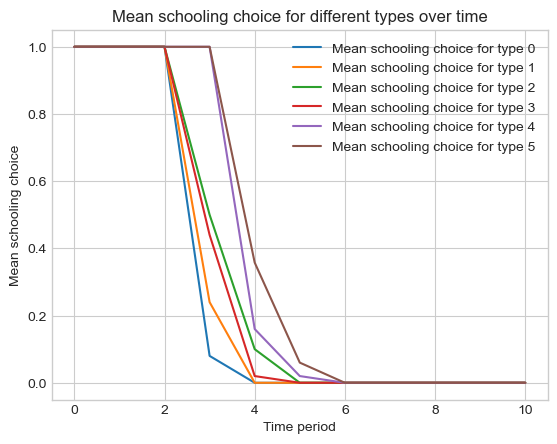

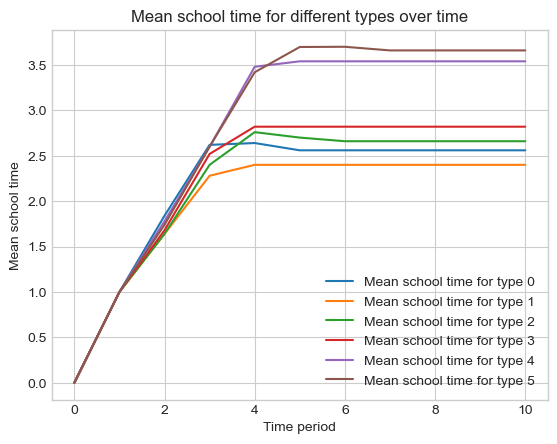

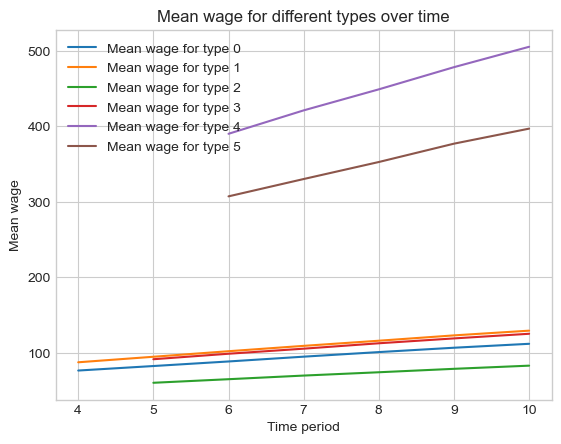

In [135]:
for vector, name in zip(plot_vectors, vector_names):
    for i in range(model.par.Nfix):
        plt.plot(vector[i], label=f"{name} for type {i}")
    plt.legend()
    plt.xlabel("Time period")
    plt.ylabel(name)
    plt.title(f"{name} for different types over time")
    plt.show()